In [1]:
import quickage
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder='/users/caganze/research/J1624/figures/'

In [3]:

#FeH = -0.38±0.07
#RV = +15±6 km/s (no Keck, could get with NIRSPEC)
#Gaia EDR: 
#π = 17.985±0.041 mas
#µra = 226.011±0.052 mas/yr
#µdec = -336.242±0.035 mas/yr

#coordinates: 04 16 31.1617564071 -28 18 52.954336524
#parallax (Gaia): 30.9326 [0.0418] mas
#proper motion (Gaia): 218.569 -251.145 [0.036 0.047]  mas/yr
#[Fe/H] = -0.03±0.09
#RV: some confusion here in the measurement, either +8.92±0.04 or +3.49±0.02 km/s - try both

import astropy.coordinates as astro_coord
import astropy.units as u

c = astro_coord.SkyCoord('04:16:31.1617564071 -28:18:52.954336524', unit=(u.hourangle, u.deg))

In [4]:
import numpy as np
p=np.random.normal( 30.9326, 0.0418, 1000)
d, dunc=np.nanmedian(1000/p), np.nanstd(1000/p)

In [5]:
#sourc={'ra':c.ra.to(u.degree).value, \
#        'dec': c.dec.to(u.degree).value,\
#        'pmra':(218.569, 0.036),
#        'pmdec':(-251.145,  0.047),
#       'distance':(d, dunc),
#       'rv': (3.49, 0.02 )}
        #'rv': (8.92, 0.04)}

#metal= (-0.03, 0.09)

filename=folder+'/age'

#trapp={'ra': 346.6250957,
#              'dec':-5.0428081,
#              'pmra': (922.0 , 0.6),
#              'pmdec': (-471.9, 0.9),
#              'distance':  (12.49 , 0.18),
#              'rv': (-51.688, 0.014)}
#trapp_metal=(0.04 , 0.08)

#ltteratiure 7.6 +/- 2.2

sourc={'ra':246.0683, \
        'dec': -32.2039,\
        'pmra':(-25.809, 0.159),
        'pmdec':(-185.783, 0.122),
       'distance':(16.9465, 0.0356),
       'rv': (0.23, 0.08)}

metal= (0.29 , 0.07)

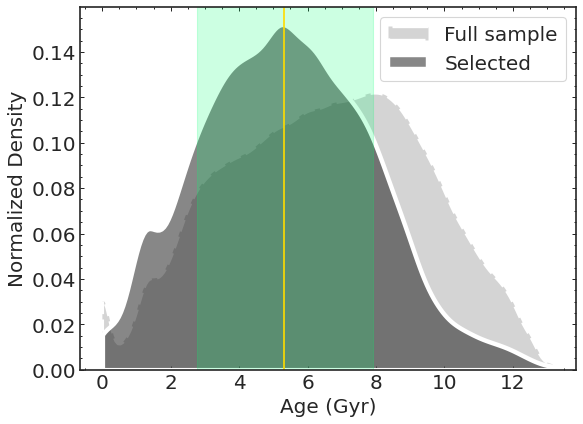

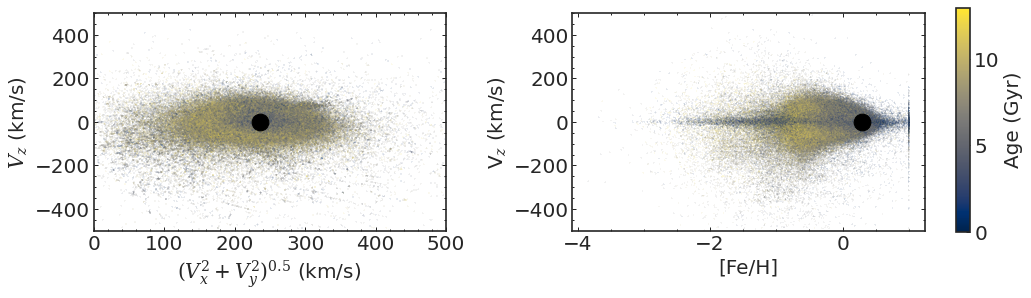

In [19]:
#select stars within vsample< v and metallicity within 1 sigma 
res_1sigma_galah=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], plot=True, plot_kde=True,
                          file_plot=filename+'vellipse_met_1sigma_rv3.pdf', cmap='cividis')

In [7]:
res

{'median_age': 5.408948317454415,
 'std_age': (2.495103817119801, 2.5441307142615344),
 'posterior': array([9.31588231, 5.64267215, 8.62551574, ..., 5.04421415, 4.07586601,
        4.06319529]),
 'weights': array([1., 1., 1., ..., 1., 1., 1.])}

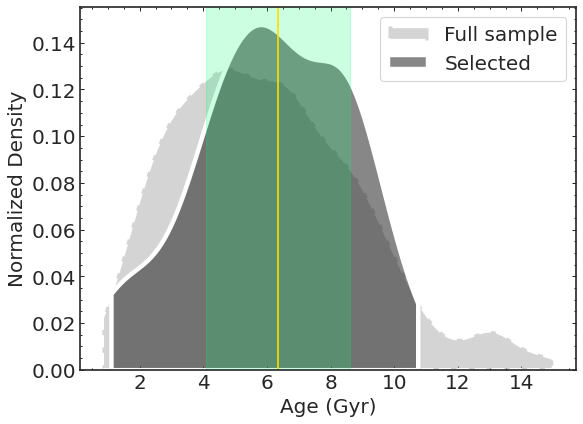

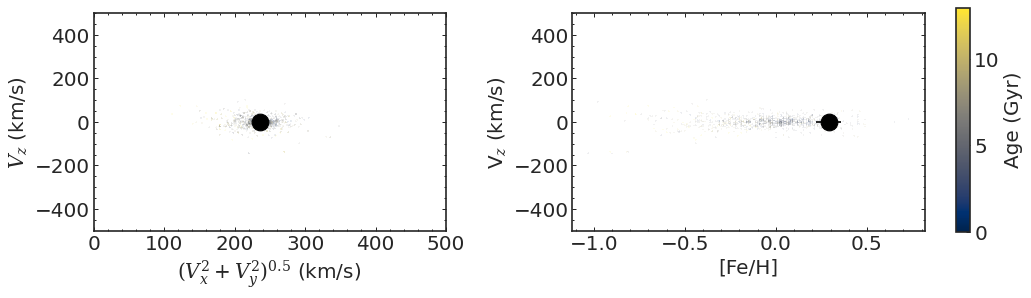

In [23]:
#select stars within vsample< v and metallicity within 1 sigma in the schneider set
res_1sigma_schneider=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='schneider',\
                          select_by=['metallicity'], plot=True, plot_kde=True,
                          file_plot=filename+'vellipse_met_1sigma_rv3.pdf', cmap='cividis')

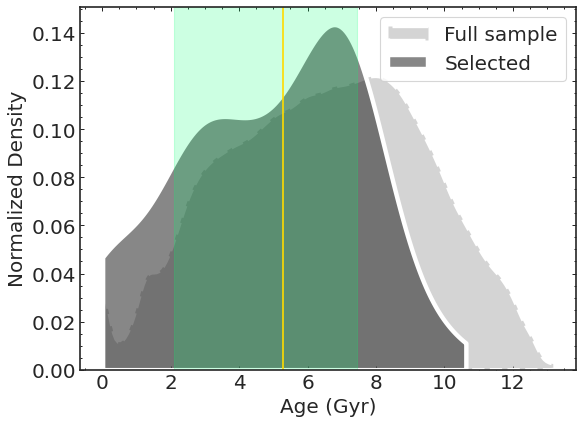

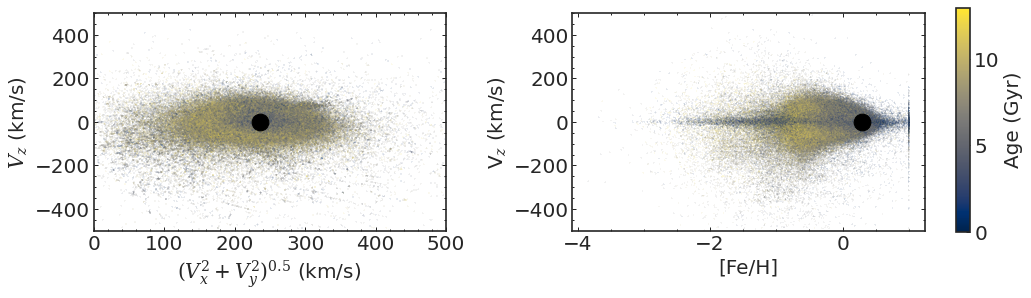

In [22]:
#select stars within |(vsample-v)|< 30 km/s and |dsample-d|< 100 pc and metallicity within 1 sigma in galah
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                          volume=100,
                           velocity_volume=30, plot=True, plot_kde=True,
                          file_plot=filename+'v30_d100_rv3.pdf', cmap='cividis')

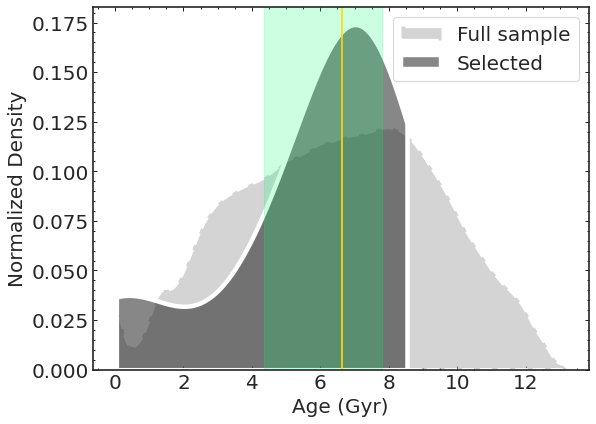

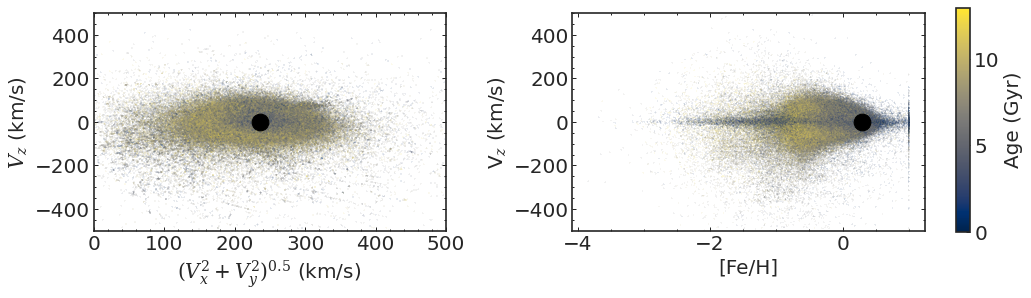

In [9]:
#select stars within |(vzsample-vz)|< 30 km/s and |vdata-vz|<30 and |dist-d|< 50 pc and metallicity within 1 sigma 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                           volume=50,
                           vertical_volume=50,
                           velocity_volume=50, plot=True, plot_kde=True,
                          file_plot=filename+'v50_vz50_d50_rv3.pdf', cmap='cividis')

In [10]:
res

{'median_age': 6.6238424670264315,
 'std_age': (2.2703215665621794, 1.1864538091736723),
 'posterior': array([0.45809497, 6.30181922, 6.77019098, 8.53375215, 7.40993577,
        7.28207917, 7.94806726, 4.34217179, 7.84511023, 6.47749396,
        4.48403573, 0.03981072, 7.23811713, 6.36051018]),
 'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [11]:
#weird young age, maybe don't trust this part yet

100%|█████████████████████████████████████████| 150/150 [02:58<00:00,  1.19s/it]


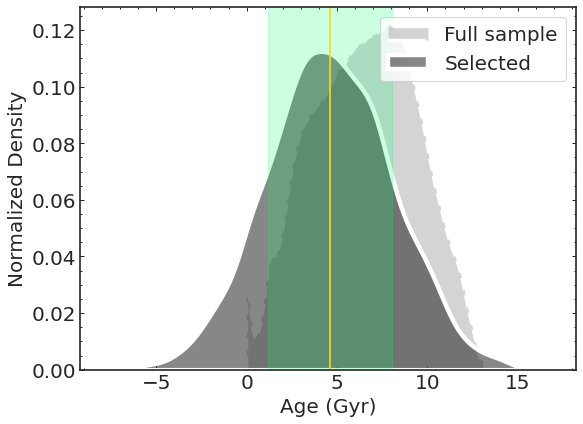

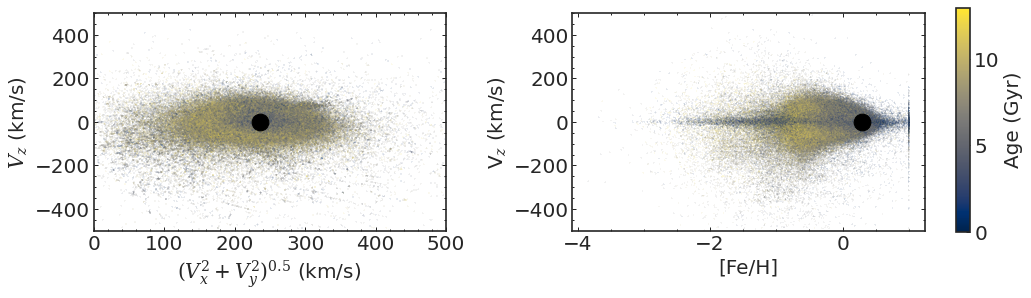

In [15]:
#select stars within 1 kpc and 500 km/s (default) and weigh them by volume over 100 iterations
#this is coded inside a nested loop so the time increases as n^2
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], fweights=150, plot=True,  weighted=True,  plot_kde=True,
                          file_plot=filename+'weighted_rv3.pdf', cmap='cividis')

In [17]:
res

{'median_age': 4.606800205415758,
 'std_age': (3.4201445643759683, 3.420144564375968),
 'posterior': array([1.1128053 , 2.28677448, 6.77629103, ..., 2.74182933, 8.82253757,
        8.83524769]),
 'weights': array([1.00000000e+00, 9.90534174e-01, 9.81157950e-01, ...,
        1.96250665e-06, 1.94392991e-06, 1.92552901e-06])}